# SECTION 2.3: Kinetic energy

In [1]:
import sys
import pickle
from numpy import *

import treal_functions
import slopes_functions
import prepare_functions

reload(treal_functions)
reload(slopes_functions)
reload(prepare_functions)

sim = ['g1.08e11'][0]
directory='/cs/sci/freundlich/CUSPCORE/Analysis/DATA/'
directory='/cs/sci/freundlich/CUSPCORE/Michael/' 

with open(directory+'NIHAO-%s.pickle'%sim[1:]) as f:
    gl = pickle.load(f)
 
gl = slopes_functions.derive_slopes(gl,polyorder=3,sigma = 21,mode= 'interp',double_smooth=False,rlim=[-2.,0.],use_fangzhou_Rvir=True)    
gl = prepare_functions.define_brho(gl,polyorder=3,sigma = 21,mode= 'interp',double_smooth=False,rlim=[-2.,0.],use_fangzhou_Rvir=True)
treal=treal_functions.load_or_create_gl(sim)

fitrange=prepare_functions.get_fitrange(gl)
gl=prepare_functions.reduce_range_gl(gl,fitrange)
treal=prepare_functions.reduce_range_Treal(treal,fitrange)

sys.path.insert(0, '/cs/sci/freundlich/CUSPCORE/Analysis/Model')
import cuspcore_aux
import cuspcore_plots
import evolving
import fitting as fit
reload(cuspcore_aux)
reload(cuspcore_plots)
reload(evolving)
reload(fit)

from cuspcore_aux import *
from cuspcore_plots import *
from evolving import *

a_array=[]

for (i,ss) in zip(range(size(gl)),gl):
    a_array.append(ss['a'])           

a_array=array(a_array)

ok_fangzhou,r12_fangzhou,rvir_fangzhou,mvir_fangzhou=get_fangzhou_radii(sim,a_array,get_all=False)
gl=fit.do_fits(gl,rvir_fangzhou,mvir_fangzhou,1.,0.01,2.)
print 'Done'



/cs/sci/freundlich/CUSPCORE/Analysis/Preparing/slopes_functions.py:33: RuntimeWarning: invalid value encountered in greater_equal
  r_range=where((log10(r/Rvir)>=rlim[0])&(log10(r/Rvir)<rlim[1]))
/cs/sci/freundlich/CUSPCORE/Analysis/Preparing/slopes_functions.py:33: RuntimeWarning: invalid value encountered in less
  r_range=where((log10(r/Rvir)>=rlim[0])&(log10(r/Rvir)<rlim[1]))
/cs/sci/freundlich/CUSPCORE/Analysis/Preparing/slopes_functions.py:42: RuntimeWarning: invalid value encountered in divide
  dM = M/sqrt(cumsum(n))
/cs/sci/freundlich/CUSPCORE/Analysis/Preparing/slopes_functions.py:46: RuntimeWarning: divide by zero encountered in log10
  logrho=log10(rho)
/cs/sci/freundlich/CUSPCORE/Analysis/Preparing/slopes_functions.py:79: RuntimeWarning: divide by zero encountered in log10
  logsigmar = log10(sigmar)
/cs/sci/freundlich/CUSPCORE/Analysis/Preparing/slopes_functions.py:80: RuntimeWarning: divide by zero encountered in log10
  logsigmar2 = 2*log10(sigmar)
/cs/sci/freundlich/CU

 
Loading existing file Treal-1.08e11.pickle


/cs/sci/freundlich/CUSPCORE/Analysis/Preparing/prepare_functions.py:123: RuntimeWarning: invalid value encountered in less_equal
  outer = r <= Rvir
/cs/sci/freundlich/CUSPCORE/Analysis/Preparing/prepare_functions.py:124: RuntimeWarning: invalid value encountered in greater
  conv  = r > 0.01*Rvir
/cs/sci/freundlich/CUSPCORE/Analysis/Preparing/prepare_functions.py:125: RuntimeWarning: invalid value encountered in greater_equal
  soft  = r >= eps


Reducing the range of gl
Reducing the range of Treal


/cs/sci/sharonl/miniconda/envs/iyt32/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Done


In [2]:
# FIGURE PROPERTIES

fontsize=20
legendsize=fontsize
linewidth=2
linesize=5
ticksize=fontsize-4
figsize=(8,16)
figsize=(8,6)

rcParams['axes.linewidth'] = 1
rcParams['xtick.major.size'] = 6
rcParams['xtick.major.width'] = 1
rcParams['xtick.minor.size'] = 3
rcParams['xtick.minor.width'] = 1
rcParams['ytick.major.size'] = 6
rcParams['ytick.major.width'] = 1
rcParams['ytick.minor.size'] = 3
rcParams['ytick.minor.width'] = 1
rcParams['xtick.labelsize'] = fontsize
rcParams['ytick.labelsize'] = fontsize

rcParams['figure.subplot.left']=0.15
rcParams['figure.subplot.right']=0.95
rcParams['figure.subplot.bottom']=0.15
rcParams['figure.subplot.top']=0.95
rcParams['figure.subplot.wspace']=0.1
rcParams['figure.subplot.hspace']=0.1


In [3]:
# COMPARE Kreal and Kvirial

from matplotlib.pylab import *
G = 4.499753324353496e-06 # gravitational constant [kpc^3 Gyr^-2 Msun^-1]

rlim=array([-2.,0.])
component='d'
tmin=3.

parsec=3.085677581e16 #m
year=3.1557600e7 #s
kms_to_kpcGyr=1/parsec*year*1e9

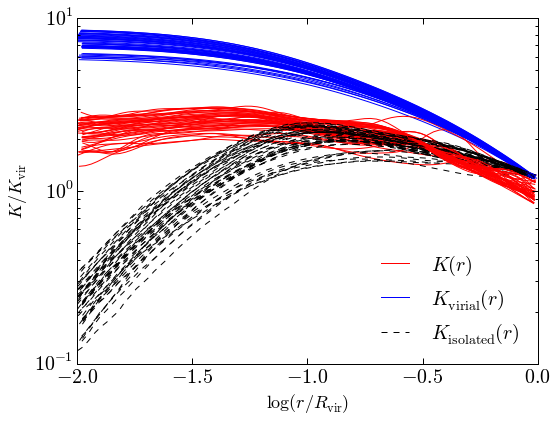

In [9]:
figure(figsize=figsize)
axhline(0,color='gray')
counter=0
for (ss, i) in zip(gl, range(size(gl))):
    
    r= ss[component]['r']
    Rvir=ss['Rvir']
    Mvir=ss[component]['Mvir']
    Kvir=0.5*G*Mvir/Rvir
    logr=log10(ss[component]['r']/ss['Rvir'])
    t=ss['t']
    
    # T as 3/2alpha Vc^2
    vc2=G*ss[component]['Mall']/ss[component]['r']
    T_virial=0.5*vc2/Kvir

    # T real
    T_real=treal[i][2]/Kvir

    #T_virial2 from 
    Utot=treal_functions.Utot(ss,r)
    TU=-0.5*Utot/Kvir
    
    if t>tmin:
        if counter==0:
            plot(log10(r/Rvir),T_real,color='r',label=r'$K(r)$')
            plot(log10(r/Rvir),TU,color='b',linestyle='-',label=r'$K_{\rm virial}(r)$')
            plot(log10(r/Rvir),T_virial,color='k',linestyle='dashed',label=r'$K_{\rm isolated}(r)$')
        else:
            plot(log10(r/Rvir),T_real,color='r')
            plot(log10(r/Rvir),TU,color='b')
            plot(log10(r/Rvir),T_virial,color='k',linestyle='dashed')

        counter=counter+1
     
yscale('log')
xlabel(r'$\log(r/R_{\rm vir})$')
ylabel(r'$K/K_{\rm vir}$') #$\rm [kpc^2 Gyr^{-2}]$
legend(fontsize=legendsize,frameon=False,loc='lower right')
xticknames=['$%.1f$'%log10(item) for item in logspace(-2,0,5)]
xticks(log10(logspace(-2,0,5)),xticknames,visible=True)
yticknames=['$10^{%i}$'%int(log10(item)) for item in logspace(-1,1,3)]
yticks(logspace(-1,1,3),yticknames,visible=True)

ylim(0.1,10)
xlim(rlim)


In [4]:
abscisse=log10(logspace(-2,0,1000))

K_curve=[]
Kvirial_curve=[]
Kin_curve=[]

for (ss, i) in zip(gl, range(size(gl))):
    
    r= ss[component]['r']
    Rvir=ss['Rvir']
    Mvir=ss[component]['Mvir']
    Kvir=0.5*G*Mvir/Rvir
    logr=log10(ss[component]['r']/ss['Rvir'])
    t=ss['t']
    
    # T as 3/2alpha Vc^2
    vc2=G*ss[component]['Mall']/ss[component]['r']
    T_virial=0.5*vc2/Kvir

    # T real
    T_real=treal[i][2]/Kvir

    #T_virial2 from 
    Utot=treal_functions.Utot(ss,r)
    TU=-0.5*Utot/Kvir
    
    logr=log10(r/Rvir)
    if t>tmin:
        K_curve.append(list(interp(abscisse,logr,T_real,left=nan,right=nan)))
        Kvirial_curve.append(list(interp(abscisse,logr,TU,left=nan,right=nan)))
        Kin_curve.append(list(interp(abscisse,logr,T_virial,left=nan,right=nan)))

K_curve=array(K_curve)
Kvirial_curve=array(Kvirial_curve)
Kin_curve=array(Kin_curve)

K_min=nan*ones_like(abscisse)
K_max=nan*ones_like(abscisse)
K_med=nan*ones_like(abscisse)
Kvirial_min=nan*ones_like(abscisse)
Kvirial_max=nan*ones_like(abscisse)
Kvirial_med=nan*ones_like(abscisse)
Kin_min=nan*ones_like(abscisse)
Kin_max=nan*ones_like(abscisse)
Kin_med=nan*ones_like(abscisse)
for i in range(size(abscisse)):
    try:
        K_min[i]=amin(array_nonan(K_curve[:,i]))
        K_max[i]=amax(array_nonan(K_curve[:,i]))
        K_med[i]=median((K_curve[:,i]))
    except:
        continue
    try:
        Kvirial_min[i]=amin(array_nonan(Kvirial_curve[:,i]))
        Kvirial_max[i]=amax(array_nonan(Kvirial_curve[:,i]))
        Kvirial_med[i]=median((Kvirial_curve[:,i]))
    except:
        continue    
    try:
        Kin_min[i]=amin(array_nonan(Kin_curve[:,i]))
        Kin_max[i]=amax(array_nonan(Kin_curve[:,i]))
        Kin_med[i]=median((Kin_curve[:,i]))
    except:
        continue        



/cs/sci/sharonl/miniconda/envs/iyt32/lib/python2.7/site-packages/numpy/lib/function_base.py:4011: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


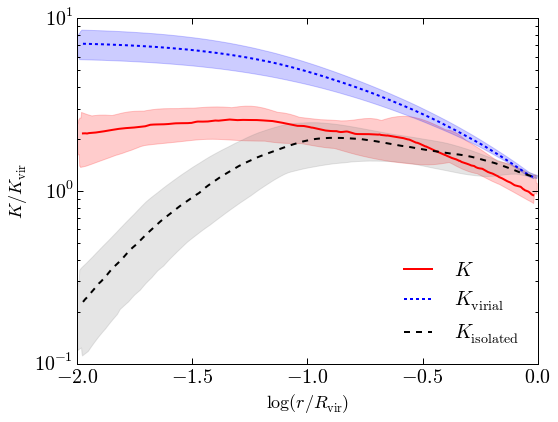

In [6]:
alpha_fill=0.2

figure(figsize=figsize)
axhline(0,color='gray')

fill_between(abscisse,K_min,K_max,color='r',alpha=alpha_fill)
plot(abscisse,K_med,lw=2,color='r',label=r'$K$')
  
fill_between(abscisse,Kvirial_min,Kvirial_max,color='b',alpha=alpha_fill)
plot(abscisse,Kvirial_med,color='b',ls='dashed',dashes=(3,3),lw=2,label=r'$K_{\rm virial}$')

fill_between(abscisse,Kin_min,Kin_max,color='gray',alpha=alpha_fill)
plot(abscisse,Kin_med,color='k',ls='--',lw=2,label=r'$K_{\rm isolated}$')


yscale('log')
xlabel(r'$\log(r/R_{\rm vir})$')
ylabel(r'$K/K_{\rm vir}$') #$\rm [kpc^2 Gyr^{-2}]$
legend(fontsize=legendsize,frameon=False,loc='lower right')
xticknames=['$%.1f$'%log10(item) for item in logspace(-2,0,5)]
xticks(log10(logspace(-2,0,5)),xticknames,visible=True)
yticknames=['$10^{%i}$'%int(log10(item)) for item in logspace(-1,1,3)]
yticks(logspace(-1,1,3),yticknames,visible=True)

ylim(0.1,10)
xlim(rlim)
